In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
adults = pd.read_csv('./adult.data',
                      header=None,
                      skipinitialspace=True,
                      names=[
                             'age', 'workclass', 'fnlwgt', 'education',
                             'education_num', 'marital_status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hours_per_week', 'native_country', 'income'
                            ]
                     )
adults

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# 1. What are the 25th, 50th, and 75th pecentiles of the “education-num” field?

eduNum = adults[["education_num"]]

print(f"25%  {adults['education_num'].quantile(0.25)}")
print(f"50%  {adults['education_num'].quantile(0.50)}")
print(f"25%  {adults['education_num'].quantile(0.75)}")

25%  9.0
50%  10.0
25%  12.0


In [4]:
# 2. What is the probability that an adult makes more than $50k given that their education-num is within 
# the ranges defined by the above quantiles (from 0 to the 25th percentile, from the 25th to the 50th etc)?

Edu = adults['education_num']
EduProb = adults[['sex', 'education_num', 'income']].groupby(['income', 'education_num']).count()
EduProb.columns = ['Count']
# From 0   -  25: 1081.5
# From 25  -  50: 1531
# From 50  -  75: 1187
# From 75  - 100: 4041.5
print('Probability    0 - 25:', round(float(1081.5/7841), 3), '%')
print('Probability   25 - 50:', round(float(1531/7841), 3), '%')
print('Probability   50 - 75:', round(float(1187/7841), 3), '%')
print('Probability  75 - 100:', round(float(4041.5/7841), 3), '%')

Probability    0 - 25: 0.138 %
Probability   25 - 50: 0.195 %
Probability   50 - 75: 0.151 %
Probability  75 - 100: 0.515 %


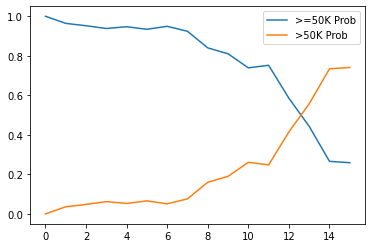

In [5]:
# 3. Plot the change in probability that a person makes more and less than $50k given their years of education.
# Values grouped by both income and education-num

EduProb = adults[['sex', 'education_num', 'income']].groupby(['income', 'education_num']).count()
EduProbT = adults[['education_num', 'income']].groupby(['education_num']).count()

LTvalues, RTvalues = [], []
for i in range(len(EduProbT)):
    LTvalues.append(round(float(EduProb.values[i][0] / EduProbT.values[i][0]), 3))
RTvalues.append(0.000)
for i in range(len(EduProbT) - 1):
    RTvalues.append(1.000 - LTvalues[i + 1])

EduP = pd.DataFrame({'>=50K Prob': [v for v in LTvalues], '>50K Prob': [v for v in RTvalues]})
EduP.plot.line()

In [6]:
# 4. What is the covariance between the number of hours worked per week and education-num?

WK = adults['hours_per_week']
EDU = adults['education_num']
Covar = np.cov(WK.values, EDU.values)
print(Covar[0][1])

4.705337944611542


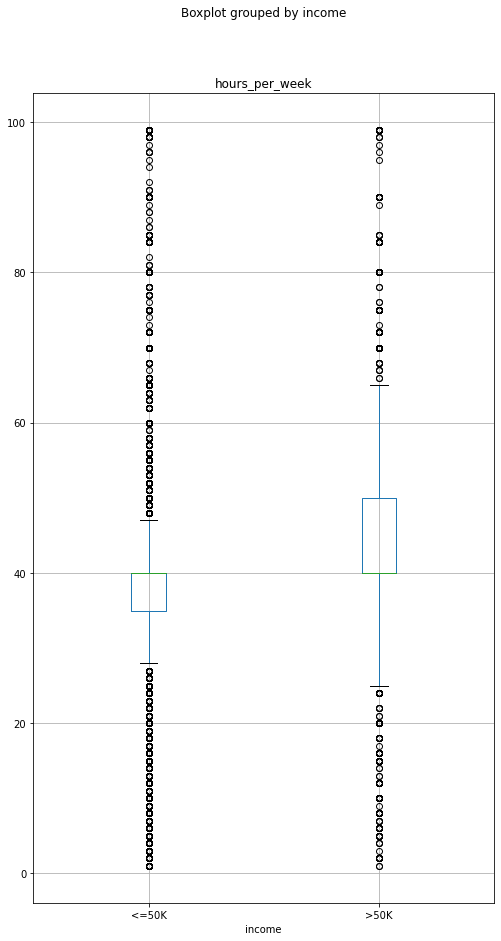

In [7]:
# 5. Use the pandas.DataFrame.boxplot functionality to create a box-and-whisker plot which illustrates 
# the spread of hours worked among adults who make both more and less than $50k.

BA = adults[['hours_per_week', 'income']]
BA.boxplot(column=['hours_per_week'], by='income', ax=pl.figure(figsize=(8, 15)).gca())

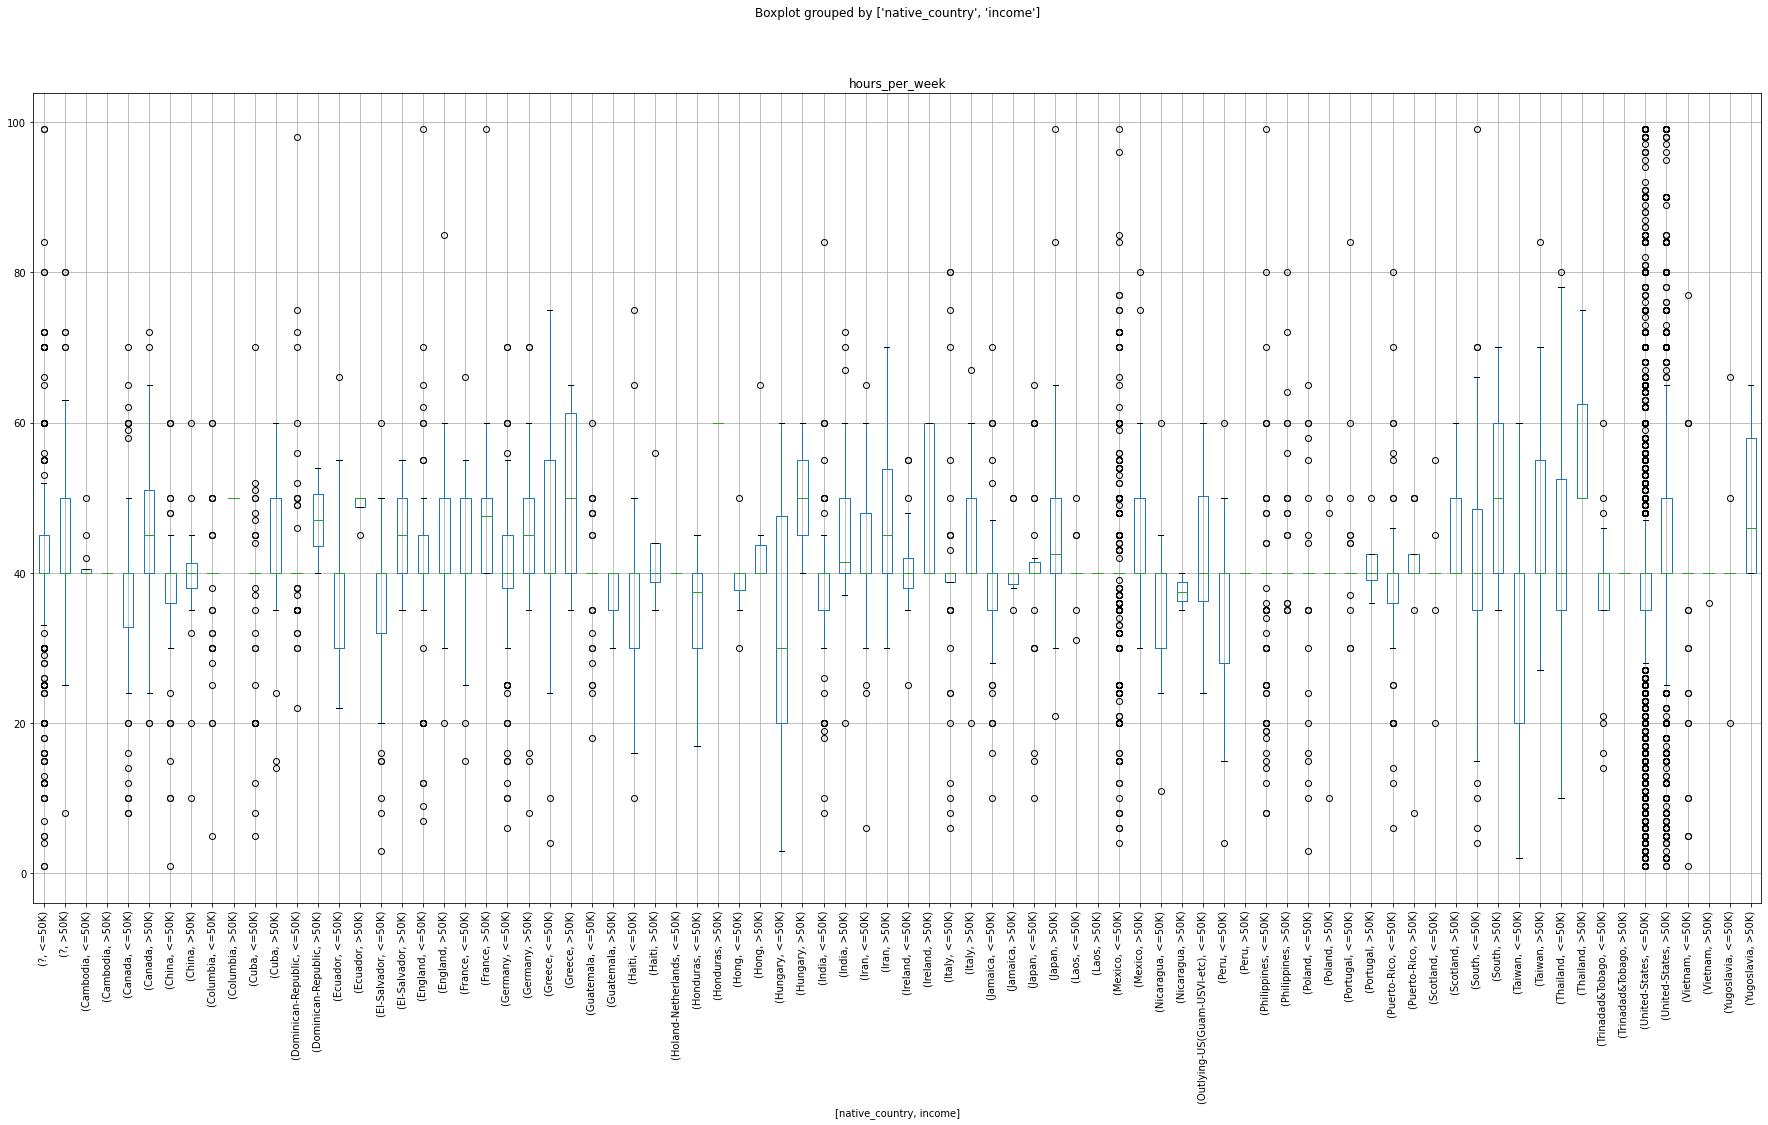

In [8]:
# 6. Use the pandas.DataFrame.boxplot functionality to create a box-and-whisker plot which illustrates 
# the spread of hours worked among adults from each native country and who make more and less than $50k.
BA2 = adults[['hours_per_week', 'income', 'native_country']]
BA2.boxplot(column=['hours_per_week'], by=['native_country', 'income'], ax=pl.figure(figsize=(30, 15)).gca(), rot=90)

In [9]:
# TODO?
# 7. Create a table where entry (x, y) contains the conditional probability
# P(A random adult has level of education x|their education-num is y)

Table1, total = [], 0
ededn = adults[['sex', 'education', 'education_num']].groupby(['education', 'education_num']).count().sort_values(['education_num'])
ededn.columns = ['Count']

for val in ededn.values:
    total += val[0]

levels = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
nums = [n+1 for n in range(16)]
print(ededn)

                            Count
education    education_num       
Preschool    1                 51
1st-4th      2                168
5th-6th      3                333
7th-8th      4                646
9th          5                514
10th         6                933
11th         7               1175
12th         8                433
HS-grad      9              10501
Some-college 10              7291
Assoc-voc    11              1382
Assoc-acdm   12              1067
Bachelors    13              5355
Masters      14              1723
Prof-school  15               576
Doctorate    16               413


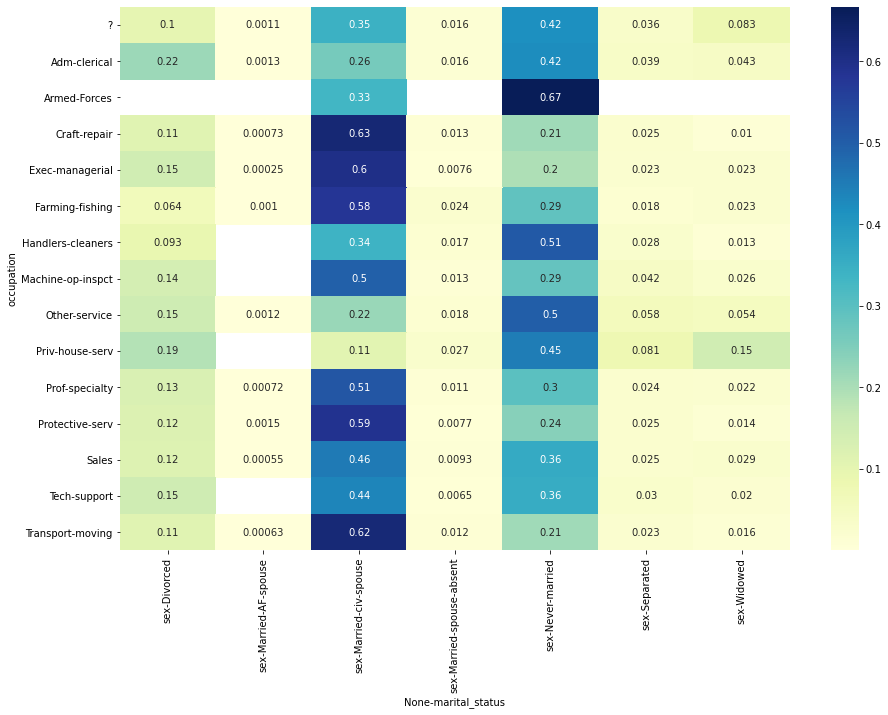

In [10]:
# 8. Create a table where entry (x, y) contains the conditional probability of having marital status x 
# given that they have occupation y.

marSat = adults[["sex", "marital_status", "occupation"]].groupby(["occupation"]).count()
marSat_occ = adults[["sex", "marital_status", "occupation"]].groupby(["occupation", "marital_status"]).count()
marSat_occ = marSat_occ.reset_index().pivot(index="occupation", columns="marital_status")

for i in range(len(marSat['marital_status'])):
    name = marSat.index[i]
    div = marSat['marital_status'][i]
    for k in range(len(marSat_occ.loc[name])):
        marSat_occ.loc[name][k] = marSat_occ.loc[name][k] / div

sns.heatmap(marSat_occ, annot=True, cmap="YlGnBu", ax=pl.figure(figsize=(15, 10)).gca())

Text(0.5, 0.98, 'Probability of Earning <=50K and >50K For All Jobs')

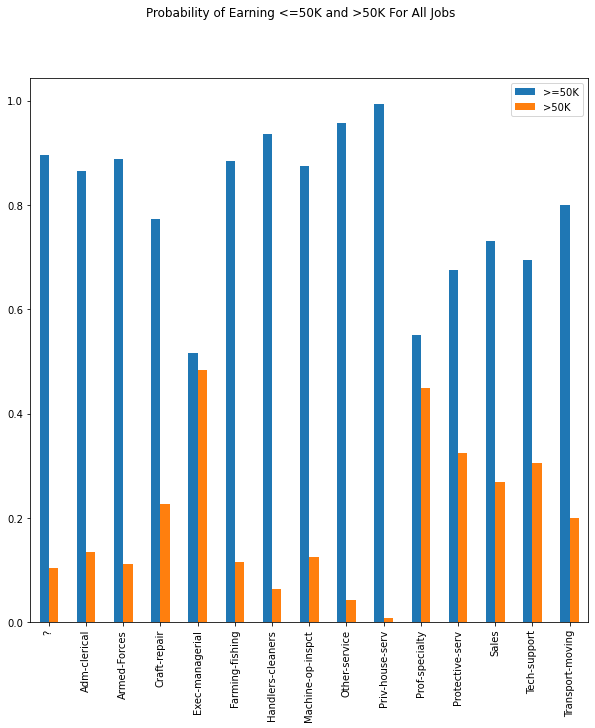

In [11]:
# 9. What is the conditional probability of making more or less than $50k given that a person works 
# in each different occupation?

OccupP = adults[['sex', 'occupation', 'income']].groupby(['income', 'occupation']).count()
OccupP2 = adults[['occupation', 'income']].groupby(['occupation']).count()

LT, GT = [], []
Jobs = ['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']

for n in range(int(len(OccupP.values)/2)):
    LT.append(round(float(OccupP.values[n][0] / (OccupP.values[n][0] + OccupP.values[n+15][0])), 3))
    GT.append(round(float(1.000 - LT[n]), 3))

IX = pd.DataFrame({'>=50K': LT, '>50K': GT}, index=Jobs)
IX.plot.bar(ax=pl.figure(figsize=(10, 10)).gca())
pl.suptitle('Probability of Earning <=50K and >50K For All Jobs')

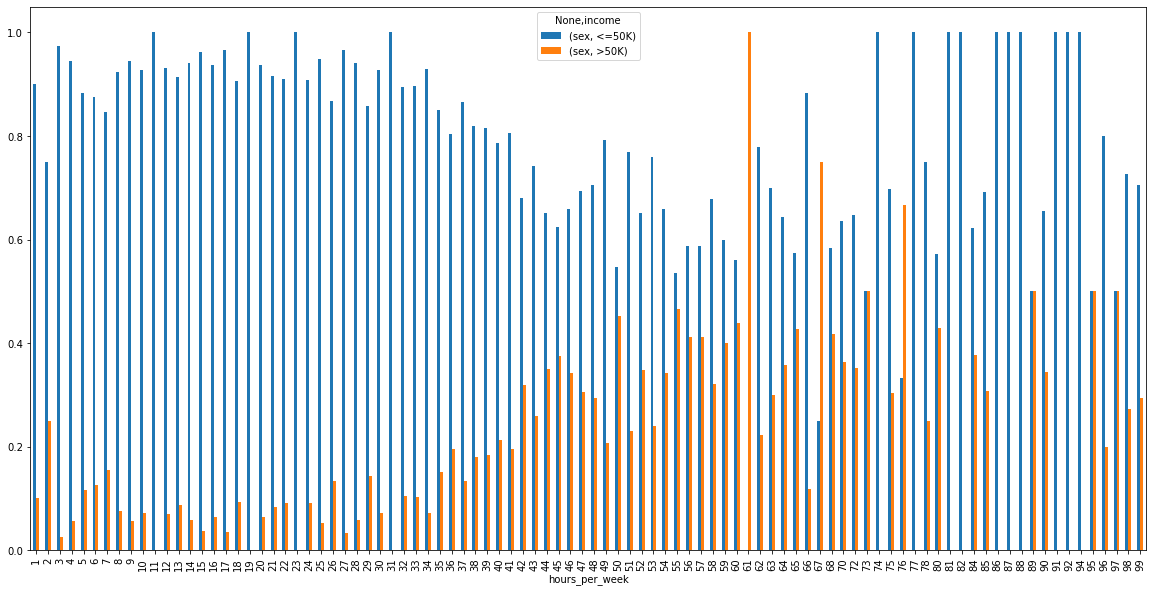

In [12]:
# 10. Plot the change in probability that a person makes more or less than $50k 
# given the amount that they work per week.

hours = adults[['hours_per_week', 'income']].groupby('hours_per_week').count()
hours_inc = adults[['sex', 'hours_per_week', 'income']].groupby(['income', 'hours_per_week']).count()
hours_inc = hours_inc.reset_index().pivot(index='hours_per_week', columns='income')

for i in range(len(hours['income'])):
    pos = hours.index[i]
    for k in range(len(hours_inc.loc[pos])):
        hours_inc.loc[pos][k] = hours_inc.loc[pos][k] / hours['income'][hours.index[i]]
    
hours_inc.plot.bar(ax=pl.figure(figsize=(20, 10)).gca())

#### If A and B are independent, show that A¯ and B, A¯ and B, A¯ and B¯ are independent.

#### Suppose we send 30% of our products to company A and 70% of our products to company B. Company A reports that 5% of our products are defective and company B reports that 4% of our products are defective. For each probability below, compute the precise value by hand, and also write a short Python script to simulate the above scenario and estimate each probability by empirically examining the rates of each event.

1. Find the probability that a product is sent to company A and it is defective.

2. Find the probability that a product is sent to company A and it is not defective.

3. Find the probability that a product is sent to company B and it is defective.

4. Find the probability that a product is sent to company B and it is not defective.

#### Show that for events A and B that P(A|B) > P(A) implies P(B|A) > P(B).